<a href="https://colab.research.google.com/github/hyunBBB/OMG/blob/main/03_Keras_API_%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN(MLP) 모델을 이용한 MNIST 데이터 셋 분류

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

* Step 1-1. Inptu tensor 와 Target tensor 준비(훈련데이터)

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
train_images[0].shape

(28, 28)

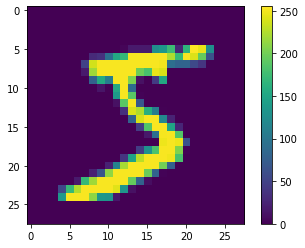

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_labels[0]

5

* Step 1-2. 입력데이터의 전처리 

In [7]:
# (60000, 28, 28) => (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

In [8]:
print(train_images.shape)

(60000, 784)


In [9]:
print(test_images.shape)

(10000, 28, 28)


In [10]:
test_images = test_images.reshape((10000, 28*28))

In [11]:
print(test_images.shape)

(10000, 784)


* Step2. DNN(MLP) 모델 디자인

In [12]:
from tensorflow.keras import models, layers

In [13]:
model = models.Sequential()
# hdden layer 256 퍼셉트론
model.add(layers.Dense(units=256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


* Step 3. 모델의 학습 정보 설정

In [15]:
# loss, optimizer, metric
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Step 4. 모델에 input, target 데이터 연결 후 학습

In [16]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 5ms/step - loss: 6.4617 - accuracy: 0.8766 - val_loss: 1.6254 - val_accuracy: 0.9287
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.9313 - accuracy: 0.9428 - val_loss: 1.0233 - val_accuracy: 0.9369
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.5645 - accuracy: 0.9579 - val_loss: 0.8030 - val_accuracy: 0.9488
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.9660 - val_loss: 0.7792 - val_accuracy: 0.9549
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.9725 - val_loss: 0.7419 - val_accuracy: 0.9587
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.9754 - val_loss: 0.7572 - val_accuracy: 0.9617
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2365 - accuracy: 0.9790 - val_loss: 0.8137 - val_accuracy: 0.9605
Epoch 

* 학습 과정 시각화 및 테스트

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
acc

[0.8766250014305115,
 0.9427916407585144,
 0.9578750133514404,
 0.9660208225250244,
 0.9724583625793457,
 0.9754375219345093,
 0.9790208339691162,
 0.9815416932106018,
 0.9835208058357239,
 0.9855416417121887,
 0.9862708449363708,
 0.9870208501815796,
 0.9887708425521851,
 0.9883333444595337,
 0.9903333187103271,
 0.9903749823570251,
 0.9908750057220459,
 0.9911875128746033,
 0.9919166564941406,
 0.9924583435058594,
 0.9929375052452087,
 0.9928958415985107,
 0.9937499761581421,
 0.9938541650772095,
 0.9947708249092102,
 0.9944166541099548,
 0.9945208430290222,
 0.9947916865348816,
 0.9948124885559082,
 0.9957916736602783]

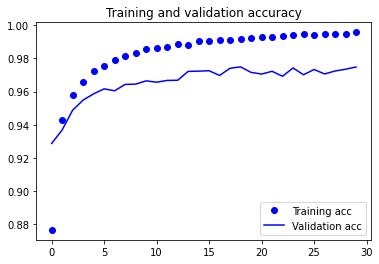

In [19]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

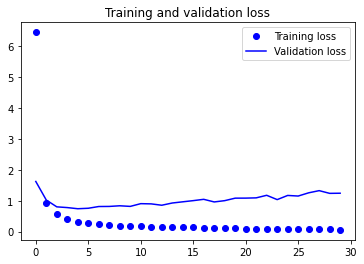

In [20]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0742 - accuracy: 0.9758


In [22]:
import numpy as np

In [23]:
predict = model.predict(test_images[0].reshape((1, 28*28)))

In [24]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [25]:
print(np.argmax(predict[0]))

7


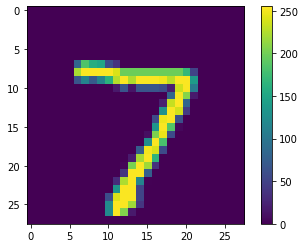

In [26]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()